In [1]:
# Notebook for calculating the 
# vibronic spectra
# This program fits potential energy surfaces
# and sets up the necessary DVR calculations
# Notebook is annotated where the DVR calculation must
# be executed before continuing 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [3]:
import scipy

In [4]:
import pandas as pd

In [5]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [6]:
from scipy.interpolate import interp1d

In [7]:
from dvr_setup_and_plotting_utils import *

120.162
potential written
dvr is set up


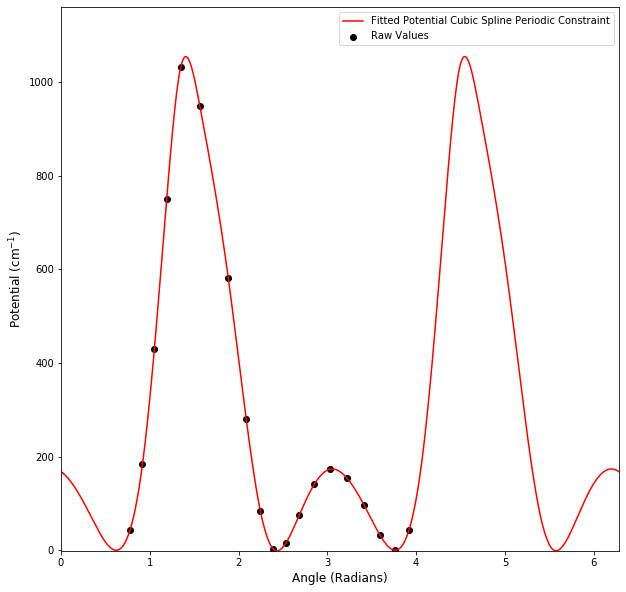

In [8]:
# Run and collect ground state information
# Reduced mass of freqency calculation =  4.0054 AMU

# Final fitted result worked best with the following fitted mass

mass_ground = 4.0054*1836*30
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500 # This number is N, number of points in DVR is 2N+1

# Linear fit used in production 
# Cubic fit also written 

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_with_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_with_water_fitted.dat',
                        output_file_name='gs_scan_with_h2o')

print('dvr is set up')


In [147]:
# At this point in the directory where the files are made
# ! cp gs_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


115.21199999999999
potential written
dvr is set up


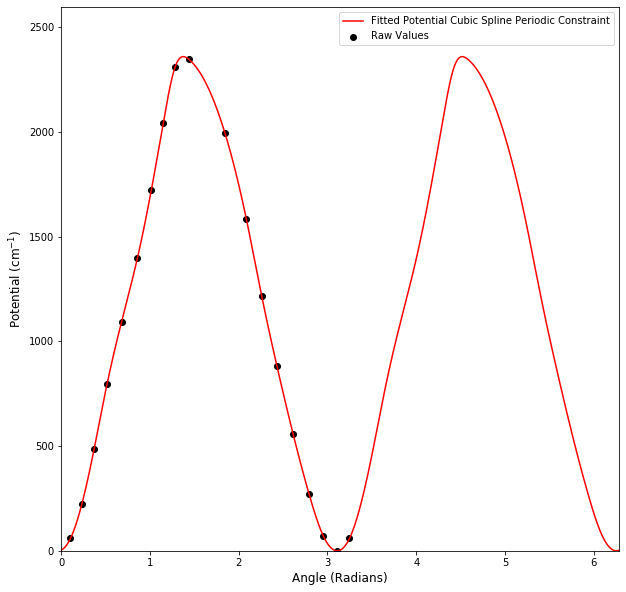

In [9]:
# Now setup and run the excited state excited state
# Reduced mass from excited state vibrational frequency calculation is 3.8404 

mass_excited =  3.8404*1836*30
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_with_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_with_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_with_water_fitted.dat',
                        output_file_name='es_scan_with_h2o')

print('dvr is set up')

In [202]:
# At this point in the directory where the files are made
# ! cp es_scan_with_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above


In [150]:
# Square overlaps calculated here

In [203]:
wavefunction_overlaps = read_wavefunctions_calculate_overlaps_vib_shift(
                                         ground_state_file_name_root='gs_scan_with_h2o',
                                         excited_state_file_name_root='es_scan_with_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=2000,
                                         vib_shift=195.0,
                                        vib_scale=6.0)

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 2.286278904105779e-07
Calculating overlap for transition with energy 78.82531467410843
Calculating overlap for transition with energy 78.82531475937355
Calculating overlap for transition with energy 157.29894672648928
Calculating overlap for transition with energy 157.29894693395383
Calculating overlap for transition with energy 234.21402013870656
Calculating overlap for transition with energy 234.2140204296856
Calculating overlap for transition with energy 309.085581465529
Calculating overlap for transition with energy 309.08558169480904
Calculating overlap for transition with energy 381.9403700576395
Calculating overlap for transition with energy 381.94037022247795
Calculating overlap for transition with energy 452.92456635322696
Calculating overlap for transition with energy 452.92456687933725
Calculating overlap for transition with energy 522.2090427280367
Calculating overlap for trans

Calculating overlap for transition with energy 842.0257181401013
Calculating overlap for transition with energy 842.0257184157084
Calculating overlap for transition with energy 901.8505590019236
Calculating overlap for transition with energy 901.8505591992176
Calculating overlap for transition with energy 960.1341498784763
Calculating overlap for transition with energy 960.1341501870535
Calculating overlap for transition with energy 1016.9985720604376
Calculating overlap for transition with energy 1016.9985725294652
Calculating overlap for transition with energy 1072.610042293099
Calculating overlap for transition with energy 1072.6100427753595
Calculating overlap for transition with energy 1127.1242233563128
Calculating overlap for transition with energy 1127.1242238783386
Calculating overlap for transition with energy 1180.6891194297798
Calculating overlap for transition with energy 1180.6891199467689
Calculating overlap for transition with energy 1233.4661032801432
Calculating overl

In [204]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[0]

{'energy': 0.0,
 'ground_state_id': 'gs_scan_with_h2o_0',
 'excited_state_id': 'es_scan_with_h2o_0',
 'overlap': 1.6503840042273395e-16}

In [205]:
# Turn list of dictionaries into a dataframe
overlap_df = pd.DataFrame(wavefunction_overlaps)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


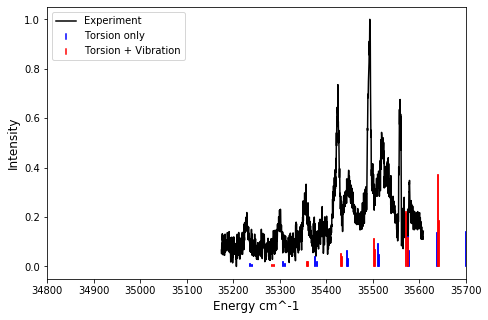

In [206]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum
# Use same color scheme as experimental section

# Exp files: PhPyH2O UV Spectrum.txt
# Exp file 2: PhPyH2O UV Spectrum.txt 

# Offset slightly different if ZPE effects included or not 

offset = 34858

kidwell_uv_spectrum_energy = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 


ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
ax.set_xlim(34800,35700)
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# In principle can 
# scale the overlaps that involve the second vibrationale xcited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)



wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)



ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion only',
       basefmt=" ")


ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_compare_mass_with_water_for_presentation.pdf')
plt.show()

In [207]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    # normalize the height of the intensities for visualization
    
    intensities = intensities/max(intensities)
    
    return frequencies,intensities


In [208]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-50,max_freq=offset+750,width=4.0,resolution=0.5)

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


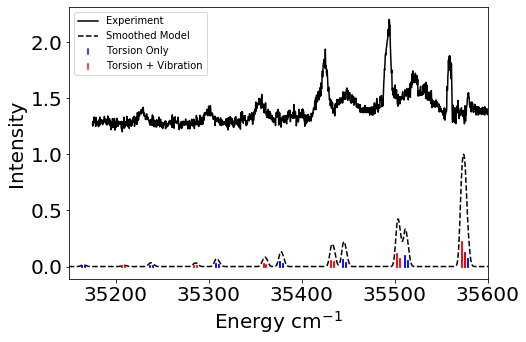

In [209]:
# Plot with both spectra on each other

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=0)
kidwell_uv_spectrum_intensity = np.loadtxt('PhPyH2O UV Spectrum.txt',usecols=1)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)


ax.set_xlim(35150,35600)

max_freq = 38000
 
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+1.2,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_for_plotting = list()

# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Might need to normalize

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_for_plotting)



ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap'],linefmt='b-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")


ax.stem(wavefunction_excited_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_for_plotting_df['overlap'],linefmt='r-',markerfmt=' ',label='Torsion + Vibration',
       basefmt=" ")


ax.legend()
plt.savefig('./theory_exp_spectrum_smooth_with_water_for_presentation.pdf',bbox_inches='tight')
plt.show()



In [210]:
# Generate plots of the wavefunctions
# or squares of the wavefunctions
ground_state_file_name_root='gs_scan_with_h2o'
excited_state_file_name_root='es_scan_with_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [211]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_with_h2o_0


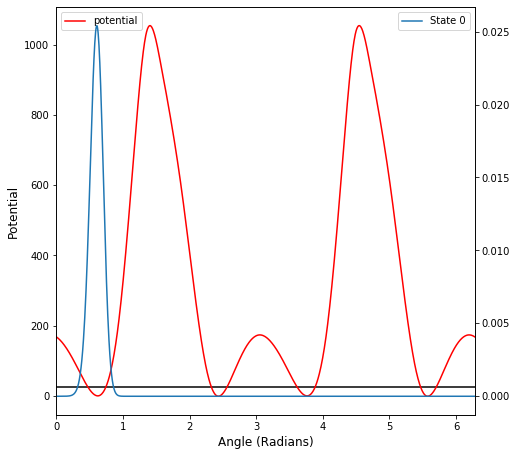

Examining state gs_scan_with_h2o_1


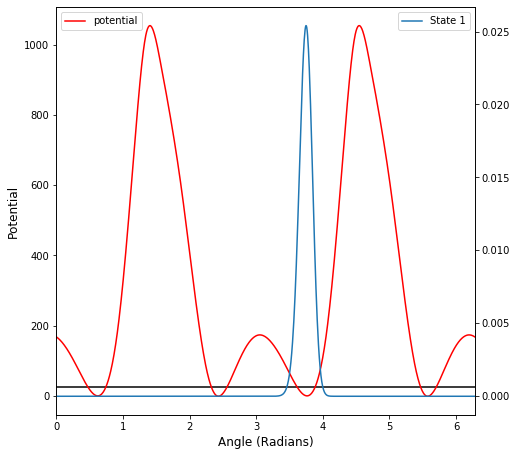

Examining state gs_scan_with_h2o_2


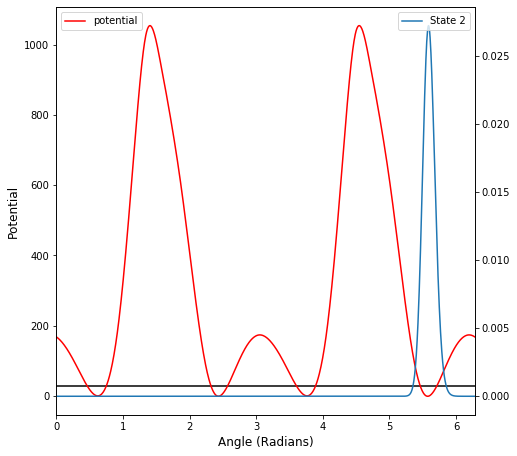

Examining state gs_scan_with_h2o_3


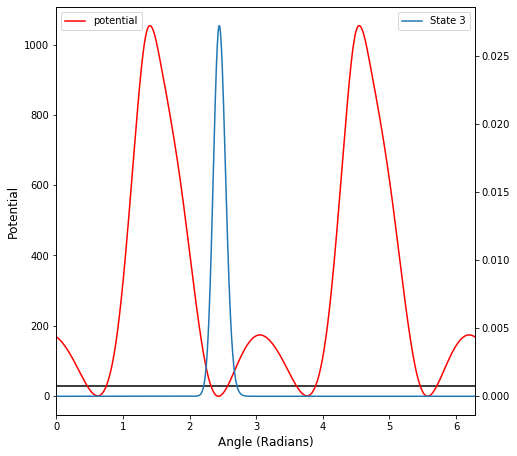

In [212]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential


wavefunction_counter = 0

max_wavefunctions = 4

prefix = "kidwell_gs_scan_with_h2o"

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_with_h2o_",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

Examining state es_scan_with_h2o_0


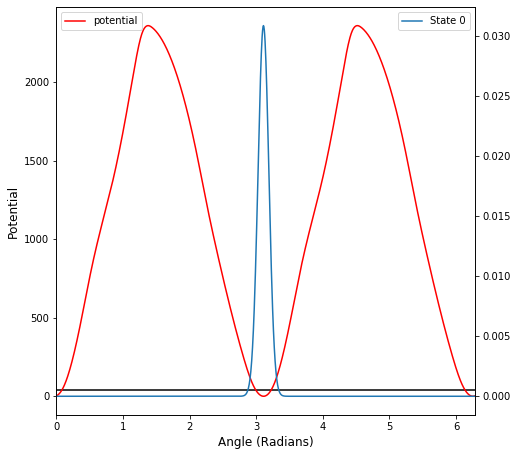

In [222]:
# Excited state square plot

excited_state_plot_list = [0]

for state in excited_state_plot_list:
    plot_wavefunction_squared(state_dict=excited_state_dict,
                        state_num=state,prefix="es_scan_with_h2o_",
                      plotting_potential_name="es_scan_with_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground)


In [214]:
# Get maximum overlaps to plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(20)

,energy,ground_state_id,excited_state_id,overlap
307,0.004725,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_25_vib_excited,0.834126
433,0.004725,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_24_vib_excited,0.830919
303,0.004445,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_23_vib_excited,0.819098
429,0.004445,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_22_vib_excited,0.816780
59,0.005277,gs_scan_with_h2o_0_vib_excited,es_scan_with_h2o_29_vib_excited,0.772439
185,0.005277,gs_scan_with_h2o_1_vib_excited,es_scan_with_h2o_28_vib_excited,0.769079
311,0.004998,gs_scan_with_h2o_2_vib_excited,es_scan_with_h2o_27_vib_excited,0.750259
437,0.004998,gs_scan_with_h2o_3_vib_excited,es_scan_with_h2o_26_vib_excited,0.749432
55,0.005012,gs_scan_with_h2o_0_vib_excited,es_scan_with_h2o_27_vib_excited,0.734541
181,0.005012,gs_scan_with_h2o_1_vib_excited,es_scan_with_h2o_26_vib_excited,0.733765


In [215]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_h2o_overlap_list_no_zpe.csv')

In [216]:
# plot potentials with energy levels

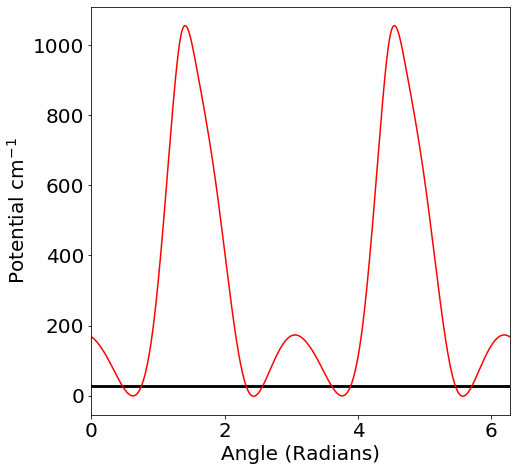

In [217]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="kidwell_gs_scan_with_h2o",
                      plotting_potential_name="gs_scan_with_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=70)

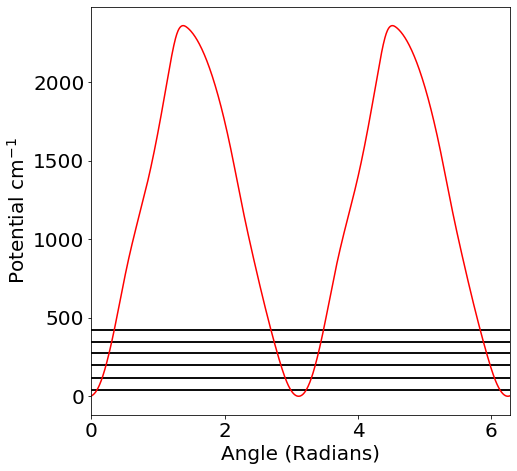

In [218]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="kidwell_es_scan_with_h2o",
                      plotting_potential_name="es_scan_with_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=450)